### Import required libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator,PonsTranslator #PONS is one of Germany’s leading language publishers
import nltk
pd.set_option('display.max_colwidth', 5000)
import seaborn as sns
import string
from wordcloud import WordCloud
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
import altair as alt
import spacy
nlp = spacy.load("en_core_web_sm")
import requests
import gensim
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords as stop
stopwords = stop.words("english")

C:\Users\Lena\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.6.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Import dataset

In [68]:
data = pd.read_csv(filepath_or_buffer = "student-teacher.csv", header=0, encoding="utf-8", delimiter="===", engine='python')

In [69]:
data

,Idee der Studierenden,Antwort des Lehrenden,Handlungsbedarf,Nächste Schritte
0,"Nach ersten Literatur-Recherchen würde ich mich in dieser Hausarbeit gerne mit den Themen learning analytics und gamification beschäftigen.Wie lässt sich gamification durch learning analytics unterstützen? Welchen Vorteil können Daten bieten, die während Lernvorgängen mit gamification erhoben werden? Führt gamification zu einer gesteigerten Lernmotivation?","damit kann ich Sie hiermit persönlich im neuen Semester begrüßen. Vielen Dank für Ihre Antworten, die ich als interessant und fundiert erachte. Auch Ihr geplanter Brückenschlag zwischen Learning Analytics und Gamification zeugt von Kreativität. Ich würde Ihnen aber empfehlen, sich mit maximal einem der beiden Schwerpunkte zu beschäftigen (und hier z. B. auf die Förderung von Lernmotiviation) einzugehen, da eine Verknüpfung beider Aspekte derzeit noch nicht ausreichend beforscht wird, so dass Sie sich im Rahmen einer Modulhausarbeit vermutlich schnell in Sackgassen manövrieren würden. Was denken Sie?",Ja,Eingrenzung auf ein Thema: Learning Analytics


### German-English Translation (if needed)

In [70]:
idee = data["Idee der Studierenden"][0]
idee

'Nach ersten Literatur-Recherchen würde ich mich in dieser Hausarbeit gerne mit den Themen learning analytics und gamification beschäftigen.Wie lässt sich gamification durch learning analytics unterstützen? Welchen Vorteil können Daten bieten, die während Lernvorgängen mit gamification erhoben werden? Führt gamification zu einer gesteigerten Lernmotivation?'

In [71]:
antwort = data["Antwort des Lehrenden"][0]
antwort

'damit kann ich Sie hiermit persönlich im neuen Semester begrüßen. Vielen Dank für Ihre Antworten, die ich als interessant und fundiert erachte. Auch Ihr geplanter Brückenschlag zwischen Learning Analytics und Gamification zeugt von Kreativität. Ich würde Ihnen aber empfehlen, sich mit maximal einem der beiden Schwerpunkte zu beschäftigen (und hier z. B. auf die Förderung von Lernmotiviation) einzugehen, da eine Verknüpfung beider Aspekte derzeit noch nicht ausreichend beforscht wird, so dass Sie sich im Rahmen einer Modulhausarbeit vermutlich schnell in Sackgassen manövrieren würden. Was denken Sie?'

handlungsbedarf = data["Handlungsbedarf"][0]
handlungsbedarf

In [72]:
schritte = data["Nächste Schritte"][0]
schritte

'Eingrenzung auf ein Thema: Learning Analytics'

In [73]:
idee_de_en = GoogleTranslator(source='german', target='english').translate(idee)
idee_de_en

'After initial literature research, I would like to deal with the topics of learning analytics and gamification in this term paper. How can gamification be supported by learning analytics? What benefit can data collected during learning processes using gamification offer? Does gamification lead to increased learning motivation?'

In [74]:
antwort_de_en = GoogleTranslator(source='german', target='english').translate(antwort)
antwort_de_en

'I can therefore personally welcome you to the new semester. Thank you for your replies, which I find interesting and well-founded. Your planned bridging between learning analytics and gamification also shows creativity. However, I would recommend that you deal with at most one of the two focal points (and here, for example, with the promotion of learning motivation), since the linking of both aspects has not yet been sufficiently researched, so that you can do a module homework would probably quickly maneuver into dead ends. What do you think?'

In [75]:
handlungsbedarf_de_en = GoogleTranslator(source='german', target='english').translate(handlungsbedarf)
handlungsbedarf_de_en

'Yes'

In [76]:
schritte_de_en = GoogleTranslator(source='german', target='english').translate(schritte)
schritte_de_en

'Narrow down to one topic: Learning Analytics'

### Need ChatGPT to answer the student's questions?
It is doable. We are doing it in one of current research direction in the Tech4compKI project.

### Word to Vector Embeddings
Convert word to a prepresentative vector by Google word2vec model. After the conversion, we can feed the text to any machine learning models to perform required tasks.

In [84]:
from nltk.data import find
word2vec = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec, binary=False)

In [94]:
try: 
    for w in idee_de_en:
        print(model[w])
except KeyError:
    next

[-4.42411e-02  8.92976e-02  4.95418e-02 -1.31500e-02 -3.75132e-02
 -5.26000e-02 -1.00715e-01 -3.71054e-02  4.64837e-02  6.56480e-02
  4.83186e-02 -7.42108e-02 -5.95317e-02 -6.16724e-03  7.84922e-03
  3.77170e-02  7.28856e-03 -2.17128e-02 -1.26403e-02  1.07035e-03
 -2.48729e-02  9.78604e-02  6.34564e-03 -3.48628e-02 -2.28341e-02
 -4.60759e-02 -8.07348e-02  4.75031e-02  8.35891e-02  5.91240e-02
  8.07348e-02  4.89302e-02  5.12238e-03 -6.03472e-02 -4.02655e-03
  1.12539e-01 -6.68713e-02  1.04384e-01 -1.17229e-02  3.85325e-02
 -7.91038e-02  2.53825e-02 -4.68914e-02 -5.75949e-03  5.99395e-02
  3.38434e-02 -2.36496e-02  4.19984e-02  4.03674e-02  3.56783e-02
 -1.03569e-01  8.11426e-02  1.21510e-01 -2.77271e-02 -4.44449e-02
  4.54643e-02 -1.78391e-03 -4.89302e-02 -3.05814e-02  4.15907e-02
 -1.06015e-01 -2.03876e-02 -1.00715e-01 -8.05310e-03 -8.92976e-02
 -1.02448e-02  7.17643e-02  4.62798e-02  3.46589e-02 -9.41906e-02
 -2.04075e-05  2.55864e-02  4.30178e-02  9.05209e-02 -1.97760e-02
  6.93178e

In [99]:
model.most_similar(positive=['learning'], topn = 5)

[('teaching', 0.6601866483688354),
 ('learn', 0.6365275382995605),
 ('teach', 0.5704741477966309),
 ('learners', 0.5508513450622559),
 ('Teaching', 0.5244370698928833)]

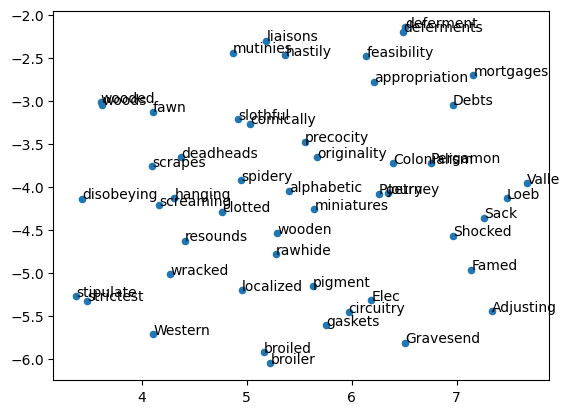

In [105]:
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['learning'])))

for term in model.key_to_index:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()

### POS tagging and Sematics

In [119]:
pos = pos_tag(word_tokenize(antwort_de_en))

words = []
types = []

for p in pos:
    word = p[0].lower()
    tag = p[1]

    if word.isalpha() and word not in stopwords:
        words.append(word)
        if   (tag[0]=="J"): types.append("Adjective")
        elif (tag[0]=="N"): types.append("Noun")
        elif (tag[0]=="R"): types.append("Adverb")
        elif (tag[0]=="V"): types.append("Verb")
        else: types.append("Other")
        
for (word, type) in zip(words, types):
    print(word, "\t", type)

therefore 	 Verb
personally 	 Adverb
welcome 	 Adjective
new 	 Adjective
semester 	 Noun
thank 	 Noun
replies 	 Noun
find 	 Verb
interesting 	 Adjective
planned 	 Verb
bridging 	 Noun
learning 	 Verb
analytics 	 Noun
gamification 	 Noun
also 	 Adverb
shows 	 Verb
creativity 	 Noun
however 	 Adverb
would 	 Other
recommend 	 Verb
deal 	 Verb
one 	 Other
two 	 Other
focal 	 Adjective
points 	 Noun
example 	 Noun
promotion 	 Noun
learning 	 Verb
motivation 	 Noun
since 	 Other
linking 	 Noun
aspects 	 Noun
yet 	 Adverb
sufficiently 	 Adverb
researched 	 Verb
module 	 Noun
homework 	 Noun
would 	 Other
probably 	 Adverb
quickly 	 Adverb
maneuver 	 Verb
dead 	 Adjective
ends 	 Noun
think 	 Verb


In [126]:
df = pd.DataFrame({"word": words, "type": types })
selection = alt.selection_point(fields=['type']) #type="multi"

base = alt.Chart(df)

chart1 = base.mark_bar().encode(
  x = alt.Y('type:N'),
  y = alt.X('count()'),
  opacity=alt.condition(selection, alt.value(1), alt.value(.25)),
).add_params(selection)

chart2 = base.mark_bar(width=5).encode(
  x = alt.X('word:N'),
  y = alt.Y('count()'),
).transform_filter(selection)

chart1 | chart2

alt.HConcatChart(...)

### Further works

https://spinningbytes.com/sentiment-analysis-distinguish-positive-and-negative-documents/

https://devmount.github.io/GermanWordEmbeddings/